<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/K_Means_basic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**: Expectation–Maximisation



Expectation–maximisation (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximisation approach here consists of the following procedure:

Guess some cluster centers
Repeat until converged
E-Step: assign points to the nearest cluster center
M-Step: set the cluster centers to the mean
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximisation step" is so-named because it involves maximising some fitness function that defines the location of the cluster centers—in this case, that maximisation is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarised as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

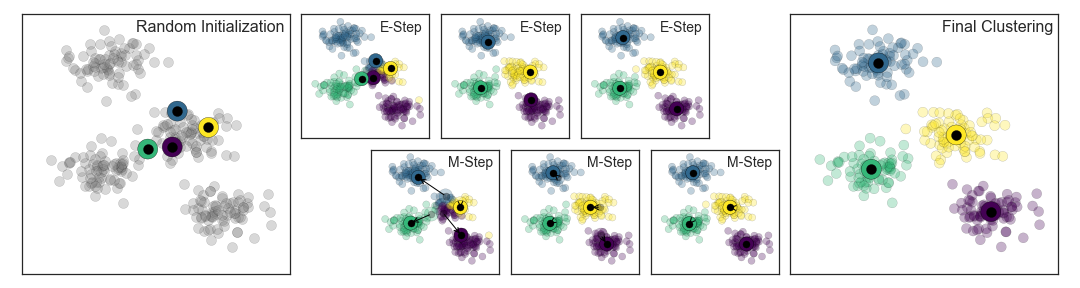

Reference: VanderPlas, J., 2016. *Python data science handbook: Essential tools for working with data*. O'Reilly Media, Inc.

## Import Packages

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load and Read Data

### *Case 1: Bus Dataset* 

Option 1:

In [ ]:
from google.colab import drive
import os

# Place the dataset in your Google Drive 
drive.mount("/content/drive")

# Set csv file path
PATH = "/content/drive/My Drive/abalone_train.csv"

In [ ]:
# Read csv from Drive
df = pd.read_csv(PATH)
df

In [ ]:
df.describe()

Option 2:

In [ ]:
# Read csv from a local file path
from google.colab import files
uploaded = files.upload()

# Read data
df2 = pd.read_csv('abalone_train.csv')
df2
# df2.describe()

In [ ]:
df2['c1'] # Access one specific column

## K-Means Clustering

Set parameters

In [7]:
N = 4 #@param{type:'slider', min:2, max:8, step:1}

Training

In [8]:
kmeans = KMeans(n_clusters=N) # Create KMeans object incoporating the parameters
kmeans.fit(df) # Train KMeans model
y_kmeans = kmeans.predict(df) # make prediction(y) on dataset

In [ ]:
X = df['c1'].tolist()
Y = df['c2'].tolist()
print(X)
print(Y)

## Plotting Clustering Results

Colourmap(cmap) Reference: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Some most common cmaps:

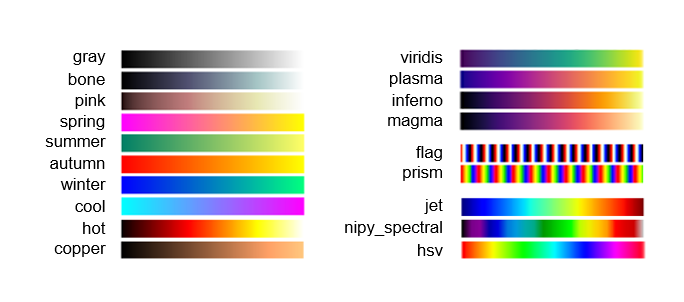

In [ ]:
plt.scatter(X, Y, c=y_kmeans, s=10, cmap='viridis') # Plot clustering results

centers = kmeans.cluster_centers_ # Access centre points
print(centers)

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1); # Plot centre points

### *Case 2: California Housing Dataset* 

In [11]:
PATH_2 = "/content/drive/My Drive/california_housing_train.csv"
df = pd.read_csv(PATH_2)

In [ ]:
df.describe()

In [13]:
N2 = 4 #@param{type:'slider', min:2, max:8, step:1}

In [14]:
kmeans_cal = KMeans(n_clusters=N2)
kmeans_cal.fit(df)
y_kmeans_cal = kmeans_cal.predict(df)

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
kmeans_cal.labels_ # type: np.ndarray

In [ ]:
results = np.where(kmeans_cal.labels_== 3) # Find the instances of the selected cluster 

type(results) 
print(type(results))

print(results)

In [ ]:
X = df['longitude'].tolist()
Y = df['latitude'].tolist()
print(X)
print(Y)

In [ ]:
plt.scatter(X, Y, c=y_kmeans_cal, s=10, cmap='viridis')

centers = kmeans_cal.cluster_centers_
print(centers)

plt.scatter(centers[:, 0], centers[:, 1], marker='+', c='red', s=100, alpha=1); # Plot centre points

plt.savefig(PATH + '\k-means.png') 

### *Case 2-1: 3D K-Means on California Housing Dataset* 

In [ ]:
Z = df['housing_median_age'].tolist()
print(Z)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=y_kmeans_cal, s=10, cmap='viridis', alpha=0.2)

centers = kmeans_cal.cluster_centers_
print(centers)

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='+', c='red', s=100, alpha=1.0); # Plot centre points

# plot axis labels
ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude')
ax.set_zlabel('Housing midian age')